In [44]:

import pandas as pd
import sys
import os
sys.path.insert(0, '..')

import spectral_denoising as sd
import matplotlib.pyplot as pyplot
from spectral_denoising.file_io import read_df
from spectral_denoising.spectra_plotter import *
fig_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/Astral'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
exp= read_df('/Users/fanzhoukong/Documents/GitHub/Libgen_data/Astral/Exploris/alignment/pos/Exploris_alignment_cleaned.csv')
astral= read_df('/Users/fanzhoukong/Documents/GitHub/Libgen_data/Astral/Astral/alignment/pos/Astral_algnment.csv')

done read in df...
done read in df...


In [3]:
reference_lib = read_df('/Users/fanzhoukong/Documents/GitHub/Libgen_data/curated_library/csv/pos_orbi_sorted.csv')

done read in df...


In [17]:
astral_searched_results = sd.denoising_search_batch(astral['peaks'], astral['precursor_mz'], reference_lib)
annotation_denoised = 0
annotation_raw = 0
for r in astral_searched_results:
    if len(r)>0:
        if r['entropy_similarity'].max() > 0.75:
            annotation_raw += 1
        if r['denoised_similarity'].max() > 0.75:
            annotation_denoised += 1

100%|██████████| 5012/5012 [08:00<00:00, 10.43it/s]


In [18]:
print(f'the number of annotation acheived with entropy search on astral data is {annotation_raw}')
print(f'the number of annotation acheived with denoising search on astral data is {annotation_denoised}')

the number of annotation acheived with entropy search on astral data is 355
the number of annotation acheived with denoising search on astral data is 523


In [19]:
exp_searched_results = sd.denoising_search_batch(exp['peaks'], exp['precursor_mz'], reference_lib)
annotation_denoised = 0
annotation_raw = 0
for r in exp_searched_results:
    if len(r)>0:
        if r['entropy_similarity'].max() > 0.75:
            annotation_raw += 1
        if r['denoised_similarity'].max() > 0.75:
            annotation_denoised += 1
print(f'the number of annotation acheived with entropy search on exploris data is {annotation_raw}')
print(f'the number of annotation acheived with denoising search on exploris data is {annotation_denoised}')

100%|██████████| 1889/1889 [06:02<00:00,  5.21it/s]


the number of annotation acheived with entropy search on exploris data is 223
the number of annotation acheived with denoising search on exploris data is 273


<BarContainer object of 1 artists>

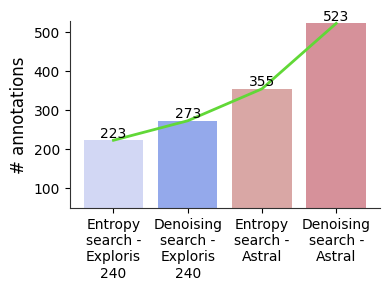

In [45]:
n_anno = [223, 273, 355, 523]
labels = ['Entropy search - Exploris 240', 'Denoising search - Exploris 240','Entropy search - Astral', 'Denoising search - Astral']
fig=plt.figure(figsize=(4,3))
ax1 = fig.add_subplot()
colors = ['#AAB6F7','#3564F7', '#CE5F5A','#CE3549']
sns.barplot(x = labels, y = n_anno, ax = ax1, alpha = 0.6, palette = colors, )
for i in ax1.containers:
    ax1.bar_label(i,)
sns.lineplot(x = labels, y = n_anno, ax = ax1, color = '#61D837',linewidth = 2)
wrap_labels(ax1, 10)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.set_ylim(50, 530)
ax1.set_facecolor("white")
# plt.legend()
plt.ylabel('# annotations', size = 12)
# plt.xlabel('')
fig.tight_layout()
ax1.spines['left'].set_color('#313131')
ax1.spines['bottom'].set_color('#313131')
ax1.spines[['right', 'top']].set_visible(False)
plt.savefig(os.path.join(fig_dir, 'n_annotation_astral.png'))